In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
import pack_ga
from IPython.display import HTML, display, clear_output
pack_cuda.USE_FLOAT32 = True
pack_cuda._ensure_initialized()


local
stop final relax at some point
init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem, 1172 bytes cmem[3]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, 404 bytes cmem[0], 16 bytes cmem[2]
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_89'
ptxas info    : Function properties fo

In [2]:
%load_ext pyinstrument

In [3]:
#%%pyinstrument
#kgs.profiling=True
# %matplotlib widget
import pack_ga3 as pack_ga2
import pack_runner
importlib.reload(pack_ga2)
fastMode = False
kgs.debugging_mode = 2 if fastMode else 1

tmp = pack_ga2.GA()

# runner = pack_ga2.Orchestrator(n_generations=3 if not fastMode else 50)
# runner.ga = pack_ga2.GAMultiRing(N=16 if not fastMode else 4)
# runner.ga.diversity_reset_threshold = 5./40
# runner.ga.mate_distance=6

# ga_base = pack_ga2.GASinglePopulationOld(N_trees_to_do=40)
# #ga_base.population_size = 250
# #ga_base.prob_mate_own = 0.25
# value = 0.125
# ga_base.population_size = int(ga_base.population_size * value)
# ga_base.selection_size = [int( (s-1) * value)+1 for s in ga_base.selection_size]
# seen = set()
# unique_selection = []
# for s in ga_base.selection_size:
#     while s in seen:
#         s += 1
#     seen.add(s)
#     unique_selection.append(s)
# ga_base.selection_size = unique_selection
# ga_base.selection_size = ga_base.selection_size[:-6]
# print(ga_base.selection_size)
# ga_base.do_legalize = False
# ga_base.reset_check_generations = 50 if not fastMode else 3
# ga_base.reset_check_threshold = 0.5 if not fastMode else 0.9
# ga_base.freeze_duration = 100 if not fastMode else 3
# #ga_base.move.moves[-1][2] *= 2
# ga_base.prob_mate_own = 0.7
# ga_base.reduce_h_threshold = 1e-5/40
# ga_base.always_allow_mate_with_better = False
# ga_base.fixed_h = -1.

# runner.ga.ga_base = ga_base
# runner.ga.do_legalize = False
# runner.ga.allow_reset_ratio = 0.5 if not fastMode else 0.
# runner.ga.make_own_fig = (2,3)
# runner.ga.make_own_fig_size = (18,12)
# runner.ga.best_costs_per_generation_ax = ((0,False,(0,0)) ,(1,True,(1,0)))
# runner.ga.plot_subpopulation_costs_per_generation_ax = ( (0,False,(0,1)) ,(1,True,(1,1)))
# runner.ga.champion_phenotype_ax = (0,2)
# runner.ga.plot_diversity_ax = (1,2)
# runner.diagnostic_plot = False
# runner.seed = 0

runner_one_nTree = pack_ga2.baseline()
runner_one_nTree.ga.do_legalize = False
runner = copy.deepcopy(runner_one_nTree)

ga_list = []
N_trees_list = [11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
for N_tree in N_trees_list:
    ga_list.append( copy.deepcopy(runner_one_nTree.ga) )
    ga_list[-1].ga_base.N_trees_to_do = N_tree
    ga_list[-1].do_legalize= False
runner.ga = pack_ga2.GAMulti(single_champion=False)
runner.ga.ga_list = ga_list
runner.ga.make_own_fig = (1,1)
runner.ga.make_own_fig_size = (8,8)
runner.ga.best_costs_per_generation_ax = ((0,False,(0,0)),)
runner.diagnostic_plot = True
runner.plot_every = 3
runner.n_generations = 60000 if not fastMode else 3
runner.filename = f'ga_multi_tree_{np.min(N_trees_list)}_to_{np.max(N_trees_list)}'

runner.seed=84


In [4]:
#runner.run()

In [5]:
rr = kgs.dill_load(kgs.temp_dir + runner.filename + '.pickle')

N=11 best score: [3.7423393e-01 3.0378083e-06]
1
N=12 best score: [3.7195835e-01 3.3160047e-06]
1
N=13 best score: [3.7155300e-01 4.3484292e-06]
1
1
N=14 best score: [3.6850935e-01 8.2500446e-06]
1
N=15 best score: [3.677016e-01 9.987912e-06]
1
N=16 best score: [3.6607268e-01 4.8457887e-06]
1
1
N=17 best score: [3.6693832e-01 4.3061937e-06]
1
N=18 best score: [3.588077e-01 8.266709e-06]
1
N=19 best score: [3.6206990e-01 7.3831425e-06]
1
N=20 best score: [3.5998708e-01 5.2513860e-06]


/tmp/ipykernel_540226/3583634074.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


1
N=21 best score: [3.6266878e-01 8.8650686e-06]
1
N=22 best score: [3.6143604e-01 7.1958048e-06]
1
N=23 best score: [3.6030608e-01 1.0549595e-05]
1
N=24 best score: [3.600837e-01 6.564521e-06]
1
N=25 best score: [3.6065930e-01 6.7747114e-06]
1
1


<Figure size 640x480 with 0 Axes>

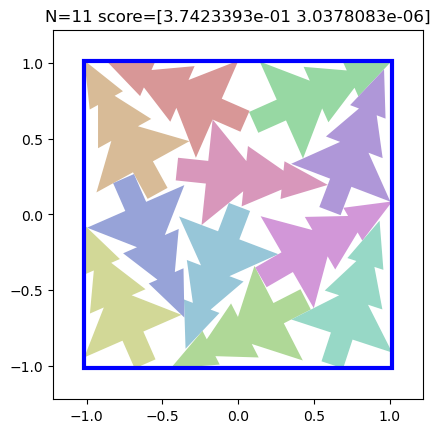

<Figure size 640x480 with 0 Axes>

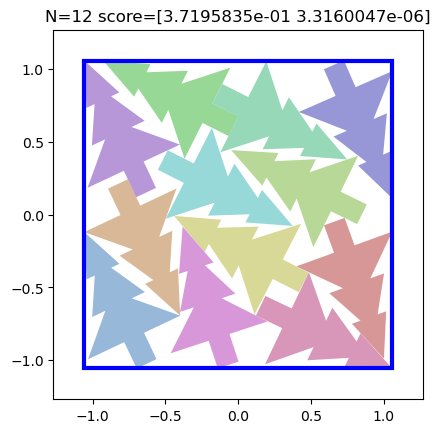

<Figure size 640x480 with 0 Axes>

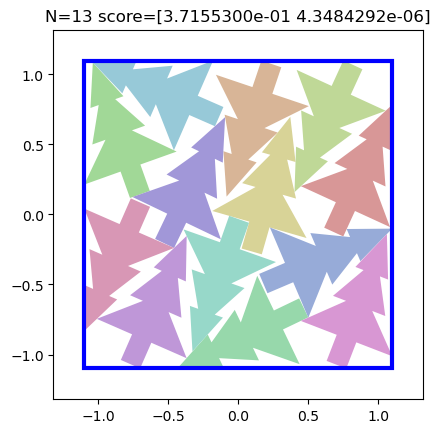

<Figure size 640x480 with 0 Axes>

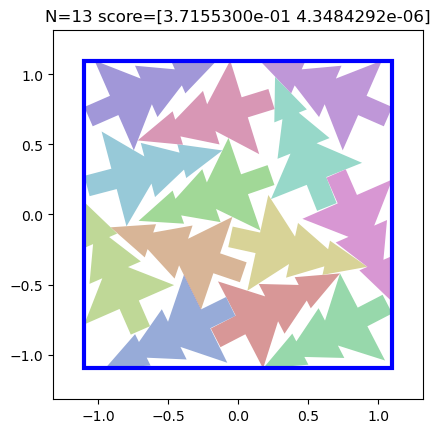

<Figure size 640x480 with 0 Axes>

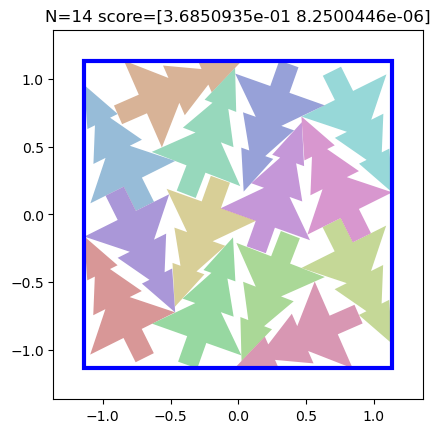

<Figure size 640x480 with 0 Axes>

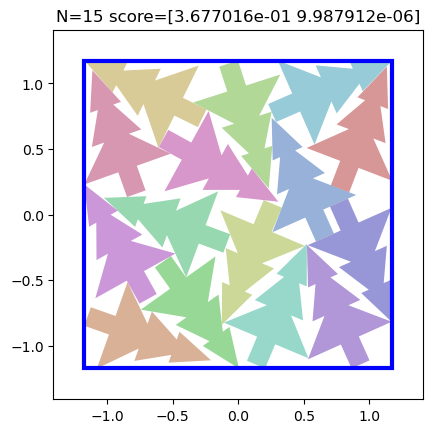

<Figure size 640x480 with 0 Axes>

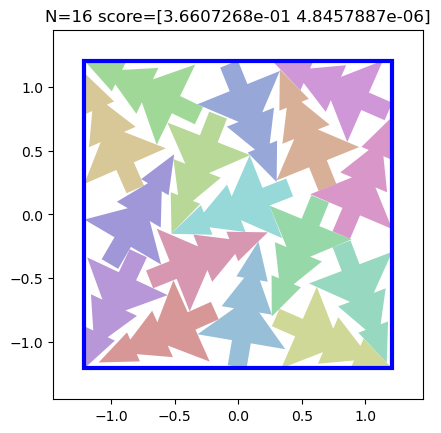

<Figure size 640x480 with 0 Axes>

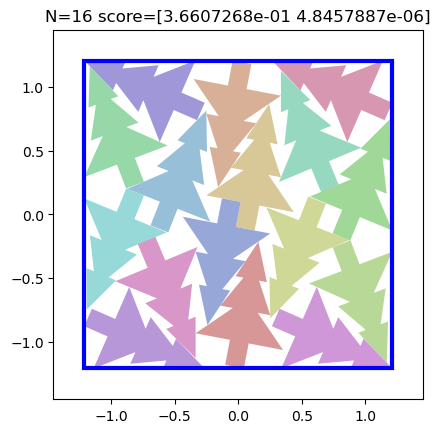

<Figure size 640x480 with 0 Axes>

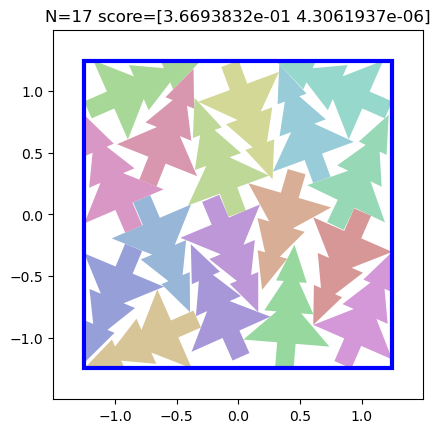

<Figure size 640x480 with 0 Axes>

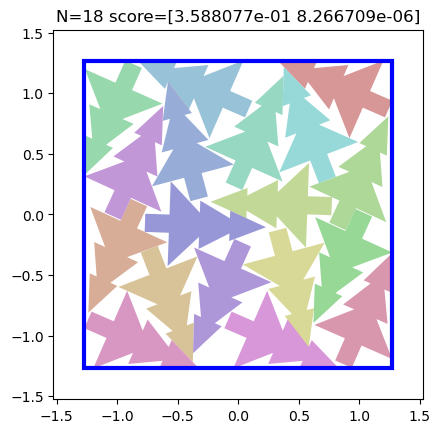

<Figure size 640x480 with 0 Axes>

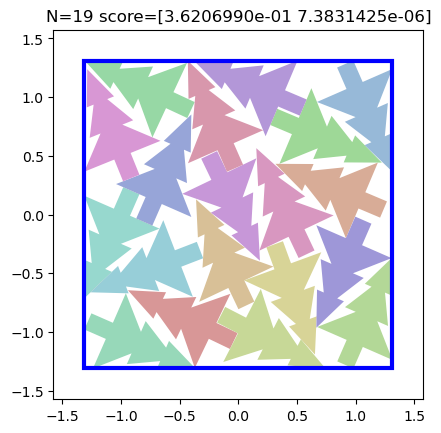

<Figure size 640x480 with 0 Axes>

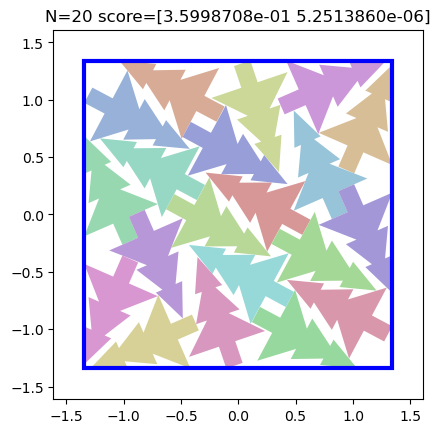

<Figure size 640x480 with 0 Axes>

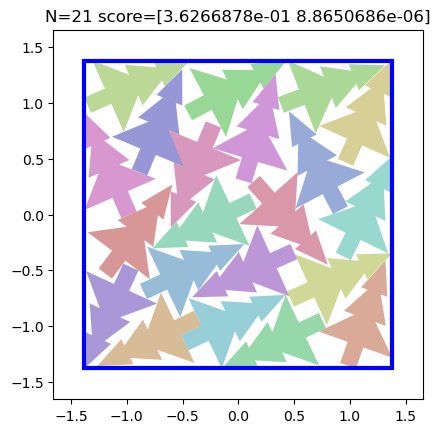

<Figure size 640x480 with 0 Axes>

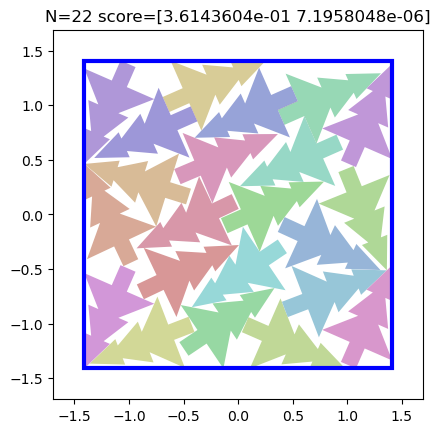

<Figure size 640x480 with 0 Axes>

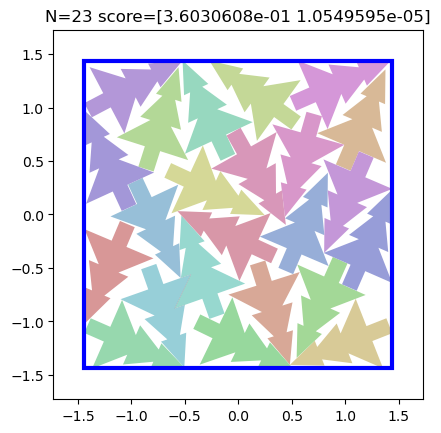

<Figure size 640x480 with 0 Axes>

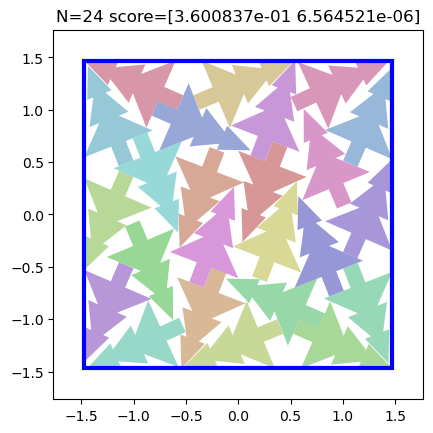

<Figure size 640x480 with 0 Axes>

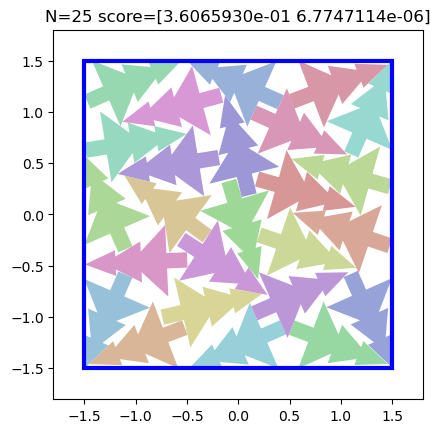

<Figure size 640x480 with 0 Axes>

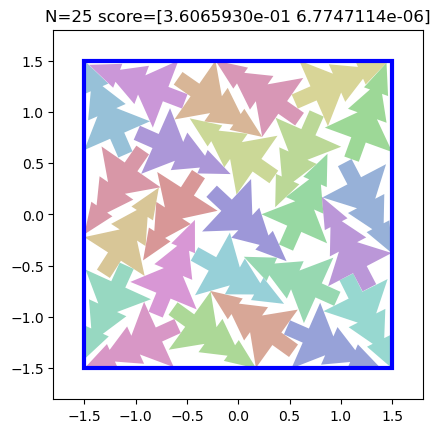

In [6]:
import pack_vis_sol
#rr.ga.diversity_reset_check_frequency = 1
#for ga in rr.ga.ga_list:
#    ga.diversity_reset_check_frequency = 1
#rr.ga.score(register_best=True) # remove duplicates
for ga in rr.ga.ga_list:
    best_score = ga.champions[-1].fitness[0]
    print(f"N={ga.ga_base.N_trees_to_do} best score: {best_score}")
    ga._fig = None
    ga._ax = None
    #ga.diagnostic_plots(-1,None)
    res = []
    for ga2 in ga.ga_list:        
        if ga2.champions[-1].fitness[0][0] == best_score[0]:
            plt.figure()
            pack_vis_sol.pack_vis_sol(ga2.champions[-1].phenotype)
            plt.title(f"N={ga.ga_base.N_trees_to_do} score={best_score}")
            res.append(ga2.champions[-1].phenotype)
            print(ga2.champions[-1].phenotype.N_solutions)

In [7]:
# importlib.reload(kgs)
# rrr=copy.deepcopy(res[0])
# rrr.merge(res[1])
# div_matrix = kgs.compute_genetic_diversity_matrix(rrr.xyt, rrr.xyt)
# div_matrix

In [8]:
for ga in rr.ga.ga_list:
    ga.do_legalize = True
rr.ga.finalize()

Before optimization:  0.041168954223394394 3.221569386369083e-06 2.028934


/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.040874067693948746 0.00011793624435085803 2.0188148
After optimization:  0.041020467877388 3.1882944313110784e-05 2.0245638
After optimization:  0.041122015565633774 8.452996553387493e-06 2.027648
After optimization:  0.04117395728826523 2.8461886358854827e-06 2.0290666
After optimization:  0.04121212288737297 6.887760264362441e-07 2.03006
After optimization:  0.04123227298259735 1.4334622733258584e-07 2.0305696
After optimization:  0.04124094918370247 3.704207784949176e-08 2.0307858
After optimization:  0.04124549403786659 9.123398925225956e-09 2.0308986
After optimization:  0.04124682769179344 5.102631206455044e-09 2.0309315
After optimization:  0.04124869406223297 1.3541565646590925e-09 2.0309775
After optimization:  0.041249603033065796 3.4492819711573475e-10 2.031
After optimization:  0.04125003144145012 1.1998163573778697e-10 2.0310104
After optimization:  0.04125029593706131 3.405675741419145e-11 2.0310168
Score of generated dataframe: 0.37500075204613753


/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.04425453394651413 0.00013220836990512908 2.1005316
After optimization:  0.04439595714211464 4.851717676501721e-05 2.1058831
After optimization:  0.04454513266682625 1.312340100412257e-05 2.110261
After optimization:  0.04463992267847061 3.4986612718057586e-06 2.1127334
After optimization:  0.04467856138944626 1.4915831343387254e-06 2.1136951
After optimization:  0.04472111165523529 2.397763978478906e-07 2.114731
After optimization:  0.04473591223359108 6.370454741499998e-08 2.1150851
After optimization:  0.04474198445677757 2.8149493402906955e-08 2.1152294
After optimization:  0.0447465144097805 1.0365324598637926e-08 2.115337
After optimization:  0.044747769832611084 7.1570562809597504e-09 2.1153667
After optimization:  0.04475070908665657 1.905357427389731e-09 2.1154363
After optimization:  0.04475224018096924 3.7825231835597606e-10 2.1154726
After optimization:  0.04475320875644684 2.3624269207545012e-11 2.1154954
Score of generated dataframe: 0.37293783908045

/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.04803992807865143 0.00011679165618261322 2.1891353
After optimization:  0.04818180203437805 2.9991308110766113e-05 2.1943521
After optimization:  0.04827670007944107 8.105887900455855e-06 2.1970115
After optimization:  0.048333656042814255 2.3449192667612806e-06 2.1984384
After optimization:  0.048368655145168304 5.69560143048875e-07 2.1992745
After optimization:  0.04838607460260391 1.620136202973299e-07 2.1996799
After optimization:  0.04839577525854111 4.262658137577091e-08 2.199903
After optimization:  0.04840030148625374 1.5730332592056584e-08 2.2000065
After optimization:  0.04840245842933655 8.452370359179895e-09 2.2000556
After optimization:  0.04840480536222458 3.1980720294200182e-09 2.2001092
After optimization:  0.04840630292892456 9.1810464786235e-10 2.2001433
After optimization:  0.048407167196273804 2.7472246699744574e-10 2.200163
After optimization:  0.0484076663851738 7.855045780491565e-11 2.2001743
Score of generated dataframe: 0.3723612583687463

/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.051298677921295166 0.00013413280248641968 2.2619581
After optimization:  0.05145597457885742 3.99205346184317e-05 2.267511
After optimization:  0.05158624425530434 1.0323035894543864e-05 2.2710333
After optimization:  0.05165884271264076 2.8428478344721952e-06 2.2727957
After optimization:  0.05170268565416336 6.48625245958101e-07 2.2738082
After optimization:  0.0517226941883564 1.7249519146389503e-07 2.2742586
After optimization:  0.051733389496803284 4.456515867445887e-08 2.2744966
After optimization:  0.05173826590180397 1.5508213380144298e-08 2.2746043
After optimization:  0.0517420694231987 3.332560227775616e-09 2.2746882
After optimization:  0.05174354091286659 1.0525401661354294e-09 2.2747207
After optimization:  0.051744356751441956 3.476995913409553e-10 2.2747386
After optimization:  0.051744818687438965 1.1759460072369166e-10 2.2747488
After optimization:  0.0517452210187912 1.6310307271449886e-11 2.2747576
Score of generated dataframe: 0.3696068120628

/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.054942358285188675 0.00011385991820134223 2.3415487
After optimization:  0.05507935956120491 3.030785774171818e-05 2.3462534
After optimization:  0.05517303943634033 8.88546128408052e-06 2.348705
After optimization:  0.05523618310689926 2.3744639747746987e-06 2.3501875
After optimization:  0.05527232214808464 5.546488068830513e-07 2.3509948
After optimization:  0.05528830736875534 1.5794037722116627e-07 2.3513432
After optimization:  0.05529677867889404 5.3131508082060463e-08 2.3515255
After optimization:  0.05530010908842087 3.398111658725611e-08 2.3515968
After optimization:  0.05530655384063721 8.27612645082354e-09 2.3517344
After optimization:  0.05530833080410957 3.986696750502006e-09 2.3517723
After optimization:  0.05531047284603119 9.591277772003082e-10 2.3518178
After optimization:  0.055311236530542374 4.2339187711348814e-10 2.351834
After optimization:  0.0553119070827961 1.3514861452179616e-10 2.3518484
After optimization:  0.055312275886535645 4.1909

/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.05824743211269379 0.00014049361925572157 2.4105382
After optimization:  0.05841752514243126 3.685432602651417e-05 2.4162092
After optimization:  0.05853487551212311 9.788682291400619e-06 2.419196
After optimization:  0.0586029551923275 2.8163690330984537e-06 2.4207466
After optimization:  0.05864257737994194 7.813289926161815e-07 2.4216068
After optimization:  0.05866502970457077 2.2280997313828266e-07 2.422082
After optimization:  0.058679111301898956 5.161469829317866e-08 2.4223762
After optimization:  0.0586840882897377 2.3606453680713457e-08 2.4224794
After optimization:  0.05868813768029213 8.771867676671263e-09 2.4225633
After optimization:  0.05869165435433388 1.9632693248894384e-09 2.422636
After optimization:  0.05869307368993759 3.63370056266632e-10 2.4226654
After optimization:  0.05869346484541893 1.7560469744992702e-10 2.4226735
After optimization:  0.05869384482502937 6.216471781783639e-11 2.4226813
Score of generated dataframe: 0.36683359196826715


/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.06198572739958763 0.0001610730541869998 2.4864564
After optimization:  0.062176480889320374 4.496223482419737e-05 2.4926195
After optimization:  0.06231414154171944 1.226531730935676e-05 2.4960344
After optimization:  0.06240155175328255 2.7431924536358565e-06 2.4979753
After optimization:  0.06243853643536568 9.034769163918099e-07 2.4987524
After optimization:  0.06246078759431839 3.1157449598140374e-07 2.4992094
After optimization:  0.06247921288013458 6.19162463522116e-08 2.499583
After optimization:  0.06248249113559723 4.282075849459943e-08 2.499649
After optimization:  0.06249064952135086 7.0433130439084835e-09 2.4998128
After optimization:  0.06249283626675606 2.7689111004036704e-09 2.4998567
After optimization:  0.062494322657585144 8.755866032217341e-10 2.4998865
After optimization:  0.06249479949474335 5.205561537380277e-10 2.499896
After optimization:  0.062495969235897064 2.465665865925004e-11 2.4999194
Score of generated dataframe: 0.367620350821377


/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.06402958929538727 0.00023285616771318018 2.5258014
After optimization:  0.06431466341018677 6.56152842566371e-05 2.5347397
After optimization:  0.06452672928571701 1.583434277563356e-05 2.5398996
After optimization:  0.06464077532291412 4.038681709062075e-06 2.5423756
After optimization:  0.06470207124948502 9.93690377981693e-07 2.5436409
After optimization:  0.06473281234502792 2.590736585261766e-07 2.5442593
After optimization:  0.06474953144788742 5.9582458078466516e-08 2.5445917
After optimization:  0.06475437432527542 2.9966784609314345e-08 2.5446875
After optimization:  0.06475996971130371 9.335161976764539e-09 2.544798
After optimization:  0.06476350873708725 1.6589851714599035e-09 2.5448675
After optimization:  0.06476455181837082 5.762278432186463e-10 2.544888
After optimization:  0.06476536393165588 1.1567115321131638e-10 2.544904
After optimization:  0.06476519256830215 2.5587438418073205e-11 2.5449007
Score of generated dataframe: 0.35980413457848487


/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.06824484467506409 0.00019633918418549 2.6086109
After optimization:  0.06847791373729706 5.863275146111846e-05 2.615708
After optimization:  0.06865833699703217 1.5369201719295233e-05 2.6199803
After optimization:  0.06876583397388458 4.0674749470781535e-06 2.6222465
After optimization:  0.06882266700267792 1.0591186310193734e-06 2.6233873
After optimization:  0.0688561201095581 2.780393799639569e-07 2.6240396
After optimization:  0.06887204945087433 6.737716518046e-08 2.6243472
After optimization:  0.06887748092412949 3.516925772828472e-08 2.6244514
After optimization:  0.0688820481300354 1.9507160331500017e-08 2.6245387
After optimization:  0.06888805329799652 4.26355661886646e-09 2.6246533
After optimization:  0.06888975203037262 1.4259647906911255e-09 2.6246858
After optimization:  0.06889096647500992 5.175978534666115e-10 2.624709
After optimization:  0.06889157742261887 2.1009238793112672e-10 2.6247206
After optimization:  0.06889209151268005 5.794766055888

/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.07161249965429306 0.00015407359751407057 2.6731708
After optimization:  0.07179538905620575 4.466631799004972e-05 2.6786325
After optimization:  0.07192607969045639 1.3927994586993009e-05 2.681644
After optimization:  0.07201960682868958 4.226098099024966e-06 2.6835682
After optimization:  0.07208360731601715 1.0474057035025908e-06 2.6848195
After optimization:  0.0721154659986496 2.9211520313765504e-07 2.685427
After optimization:  0.07213303446769714 8.074546542502503e-08 2.6857579
After optimization:  0.07214315235614777 1.9532109263309394e-08 2.6859474
After optimization:  0.07214619964361191 1.0400252214992634e-08 2.6860044
After optimization:  0.07215060293674469 2.1485515588892667e-09 2.6860864
After optimization:  0.07215215265750885 6.276220099188379e-10 2.6861153
After optimization:  0.07215274125337601 3.230077039173551e-10 2.6861262
After optimization:  0.07215356826782227 6.479387859581465e-11 2.6861417
Score of generated dataframe: 0.360766545958374

/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.07571613043546677 0.00019980373326689005 2.7480235
After optimization:  0.07594973593950272 5.463472189148888e-05 2.7549067
After optimization:  0.07612454891204834 1.4457767974818125e-05 2.7588058
After optimization:  0.07622431963682175 4.135759809287265e-06 2.7608004
After optimization:  0.07628475874662399 1.1042651522075175e-06 2.7619495
After optimization:  0.07631776481866837 3.065850364691869e-07 2.7625616
After optimization:  0.07633665949106216 8.363112158349395e-08 2.7629075
After optimization:  0.07634633034467697 2.9073476071062032e-08 2.7630835
After optimization:  0.07634919136762619 1.983171493691316e-08 2.7631354
After optimization:  0.07635471224784851 7.463624385195544e-09 2.7632356
After optimization:  0.07635796070098877 1.5414470810881653e-09 2.7632945
After optimization:  0.07635879516601562 9.768655884201394e-10 2.7633095
After optimization:  0.07635980099439621 3.824017769105126e-10 2.7633278
After optimization:  0.07636073976755142 6.843

/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.07892176508903503 0.00024741434026509523 2.804895
After optimization:  0.0792153924703598 6.72333626425825e-05 2.8133283
After optimization:  0.0794266015291214 1.8127335351891816e-05 2.817951
After optimization:  0.07955197244882584 5.339614745025756e-06 2.8204014
After optimization:  0.0796249657869339 1.3445642252918333e-06 2.821766
After optimization:  0.07966580241918564 3.7658170981558214e-07 2.8225064
After optimization:  0.0796893984079361 9.33649246803725e-08 2.8229294
After optimization:  0.07969649881124496 5.093974309033911e-08 2.823056
After optimization:  0.07970568537712097 1.569317475969001e-08 2.8232193
After optimization:  0.07971105724573135 2.030501544680874e-09 2.8233147
After optimization:  0.0797124058008194 7.35934369000546e-10 2.8233385
After optimization:  0.07971309870481491 3.686891347776111e-10 2.823351
After optimization:  0.07971362769603729 1.7257345552579295e-10 2.8233602
After optimization:  0.07971415668725967 4.97456104087135e-

/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.08219080418348312 0.00028696501976810396 2.8618846
After optimization:  0.08251054584980011 9.076645801542327e-05 2.8708844
After optimization:  0.08279340714216232 2.1864592781639658e-05 2.8770044
After optimization:  0.08294925838708878 5.433537808130495e-06 2.879997
After optimization:  0.08302988111972809 1.4208180800778791e-06 2.881466
After optimization:  0.08306486159563065 5.632551278722531e-07 2.8820877
After optimization:  0.08309654891490936 1.0463525512705019e-07 2.8826454
After optimization:  0.08310376107692719 5.988279383473127e-08 2.8827713
After optimization:  0.08310817182064056 4.37549481091537e-08 2.882848
After optimization:  0.08311906456947327 1.0126936622611993e-08 2.8830376
After optimization:  0.08312344551086426 2.1892130330769533e-09 2.8831136
After optimization:  0.08312444388866425 1.4103878065441222e-09 2.883131
After optimization:  0.08312580734491348 6.005247410456604e-10 2.8831546
After optimization:  0.08312715590000153 1.151837

/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.08585825562477112 0.00021844569710083306 2.926428
After optimization:  0.08610883355140686 7.026919047348201e-05 2.933233
After optimization:  0.08631749451160431 2.1884705347474664e-05 2.9376116
After optimization:  0.0864768773317337 4.633586286217906e-06 2.9406164
After optimization:  0.08654630929231644 1.2375543292364455e-06 2.9418545
After optimization:  0.08658621460199356 2.8460988232836826e-07 2.9425488
After optimization:  0.08660385757684708 7.73293038491829e-08 2.942852
After optimization:  0.08661282807588577 2.5364037981034926e-08 2.9430053
After optimization:  0.08661903440952301 5.579619877238429e-09 2.9431112
After optimization:  0.08662159740924835 1.6956773762899502e-09 2.9431548
After optimization:  0.08662299066781998 5.423360649459141e-10 2.9431784
After optimization:  0.08662369847297668 2.0514491494427745e-10 2.9431903
After optimization:  0.08662435412406921 2.9837035619983965e-11 2.9432015
Score of generated dataframe: 0.3609307982959688

/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.08963412791490555 0.00022827819338999689 2.990081
After optimization:  0.08991724997758865 5.79521874897182e-05 2.9976542
After optimization:  0.09010407328605652 1.5117019756871741e-05 3.0014822
After optimization:  0.09020960330963135 3.9859905882622115e-06 3.0034251
After optimization:  0.09026889503002167 9.911470897350227e-07 3.0044618
After optimization:  0.09029906988143921 2.6853382451008656e-07 3.004976
After optimization:  0.09031597524881363 6.50316991368527e-08 3.0052607
After optimization:  0.09032290428876877 2.406028443147079e-08 3.0053766
After optimization:  0.0903274193406105 7.896372444804456e-09 3.005452
After optimization:  0.09033083915710449 1.3646677121670336e-09 3.005509
After optimization:  0.09033169597387314 5.962599858300166e-10 3.0055232
After optimization:  0.09033240377902985 2.016606881483085e-10 3.005535
After optimization:  0.09033279865980148 8.092776448975769e-11 3.0055416
Score of generated dataframe: 0.3613297163164176


In [9]:
# import pack_io
# sol_list = [ga.champions[-1].phenotype for ga in rr.ga.ga_list]
# df = pack_io.solution_list_to_dataframe(sol_list)

In [10]:
sol_list = [ga.champions[-1].phenotype for ga in rr.ga.ga_list]
kgs.dill_save(kgs.code_dir + f'../res/' + runner.filename + '.pickle', sol_list)

In [11]:
print(kgs.code_dir + f'../res/' + runner.filename + '.pickle')

/mnt/d//packing/code/core/../res/ga_multi_tree_11_to_25.pickle
